In [3]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go

from sklearn.datasets import make_blobs

In [13]:
NUM_ITERATIONS = 50
def kmeans(blobs, k):
    centers = blobs[np.random.randint(0, blobs.shape[0], k)]
    centers_x = centers[:, 0].reshape(-1, 1)
    centers_y = centers[:, 1].reshape(-1, 1)
    for i in range(NUM_ITERATIONS):
        dist_x = blobs[:, 0] - centers_x
        dist_y = blobs[:, 1] - centers_y
        dist = np.sqrt(dist_x ** 2 + dist_y ** 2)
        centers = np.argmin(dist, axis=0).reshape(-1, 1)
        res = np.hstack((blobs, centers))
        for j in range(k):
            centers_x[j, 0] = res[res[:, 2] == j][:, 0].mean()
            centers_y[j, 0] = res[res[:, 2] == j][:, 1].mean()
    return res
    


In [20]:
blobs = make_blobs(500, 2, 4)[0]
cc = kmeans(blobs, 4)

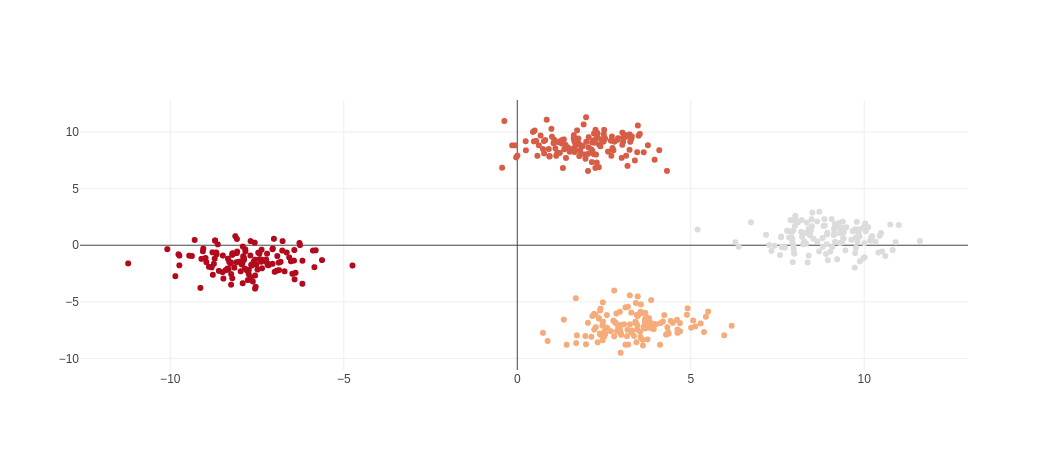

In [21]:
bb = go.Scatter(x=cc[:, 0], y=cc[:, 1], marker=dict(color=cc[:, 2]), mode='markers')
py.iplot([bb])